In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict

#from mlxtend.classifier import StackingClassifier

from sklearn.externals import joblib



# Task 1-Classification -->Target='SARS-Cov-2 exam result'

In [225]:
df=pd.read_csv('E:\\covid19_clinical_brazil.csv',encoding='latin1')
pd.set_option('display.max_columns',None)

In [226]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [227]:
df.shape

(5644, 111)

In [228]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [229]:
df.isnull().sum().head(60)

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

# Dropping unnecessary column

In [230]:
df=df.drop('Patient ID',axis=1)

# Rplacing target variable with numericals

In [231]:
df['SARS-Cov-2 exam result']=df['SARS-Cov-2 exam result'].replace(['positive','negative'],[1,0])

In [232]:
df['Influenza A'].value_counts()

not_detected    1336
detected          18
Name: Influenza A, dtype: int64

# Imputing missing values where columns data type is numeric

In [233]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    df[feature]=df[feature].fillna(df[feature].mean())

In [234]:
len(numerical_features)

75

# Imputing missing values where columns data type is categorical

In [235]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features:
    df[feature]=df[feature].fillna(df[feature].mode()[0])

In [236]:
len(categorical_features)

35

# Checking for missing values

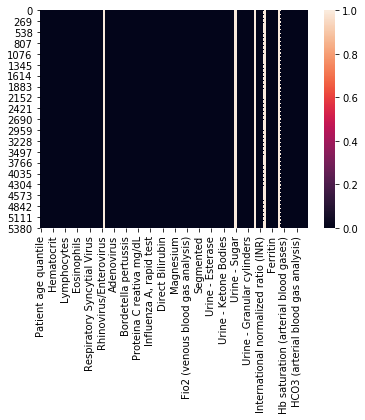

In [237]:
sns.heatmap(df.isnull())#There are still missing values,
#Actually in these features all the data are missing so they dint get imputed by any mean or mode method.

In [238]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,-6.594685e-09,-3.378738e-09,7.146180e-09,-4.149502e-09,-3.269551e-09,1.020598e-08,7.067308e-09,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,5.890838e-09,-6.707809e-09,2.760870e-09,-6.669811e-09,2.053100e-08,1.105946e-08,negative,negative,2.742222e-09,-5.265486e-10,-1.535948e-09,-2.626374e-09,1.206044e-08,3.170330e-09,-2.048611e-09,1.914000e-08,negative,-5.225000e-09,-1.935294e-08,1.508088e-08,-1.058824e-09,-7.933824e-09,0.0,-9.139706e-09,3.617647e-09,-4.463235e-09,2.793815e-09,-2.670103e-08,7.257732e-09,8.453608e-09,1.410309e-08,0.0,absent,clear,5.0,absent,absent,absent,not_done,-2.585714e-09,normal,absent,NaN,3000,Ausentes,7.585714e-09,absent,absent,absent,yellow,NaN,-9.230769e-10,-4.774436e-09,1.752475e-09,NaN,-2.000000e-08,-6.471154e-09,7.260870e-09,-1.370370e-09,-3.875000e-09,NaN,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
1,17,0,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,-2.237665e-01,-2.922693e-01,1.482158e+00,1.661924e-01,3.575467e-01,-6.250727e-01,-1.406481e-01,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_d

In [239]:
df=df.dropna(how='all',axis=1)

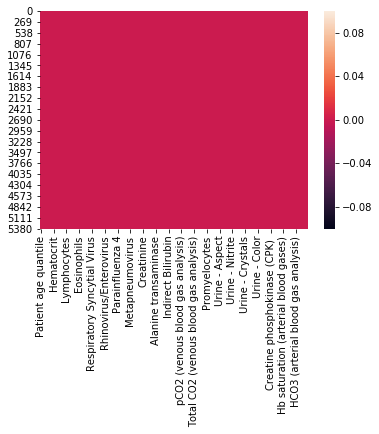

In [240]:
sns.heatmap(df.isnull())

In [241]:
df.shape

(5644, 105)

# Feature Engineering

In [242]:
df.describe()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Red blood cells,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.0,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.0,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,9.318391,0.098866,0.013997,0.008859,0.007264,-2.187398e-09,-1.598342e-08,-3.820600e-10,7.373957e-09,8.416942e-09,-7.863787e-09,9.784055e-10,6.218887e-09,-6.594685e-09,-3.378737e-09,7.146179e-09,-4.149502e-09,-3.269551e-09,1.020598e-08,7.067308e-09,5.890839e-09,-6.707809e-09,2.760870e-09,-6.669811e-09,2.053100e-08,1.105946e-08,2.742222e-09,-5.265478e-10,-1.535948e-09,-2.626374e-09,1.206044e-08,3.170330e-09,-2.048611e-09,1.914000e-08,-5.225000e-09,-1.935294e-08,1.508088e-08,-1.058824e-09,-7.933823e-09,0.0,-9.139706e-09,3.617647e-09,-4.463235e-09,2.793815e-09,-2.670103e-08,7.257732e-09,8.453608e-09,1.410309e-08,0.0,-2.585714e-09,7.585714e-09,-9.230768e-10,-4.774436e-09,1.752475e-09,-2.000000e-08,-6.471154e-09,7.260869e-09,-1.370370e-09,-3.875000e-09,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
std,5.777903,0.298509,0.117489,0.093713,0.084929,3.268915e-01,3.268915e-01,3.266203e-01,3.258055e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.263489e-01,3.266203e-01,1.919891e-01,3.015113e-01,2.652407e-01,2.994472e-01,2.741119e-01,2.564082e-01,2.560624e-01,1.996808e-01,2.001240e-01,1.646610e-01,1.795894e-01,1.795894e-01,1.795894e-01,1.597446e-01,9.413042e-02,8.419280e-02,1.552439e-01,1.552439e-01,1.552439e-01,1.552439e-01,0.0,1.552439e-01,1.552439e-01,1.552439e-01,1.311085e-01,1.311085e-01,1.311085e

In [243]:
#There are outliers in dataset as there is a huge difference between the max and mean values of some features.

# EDA

# Univariate analysis

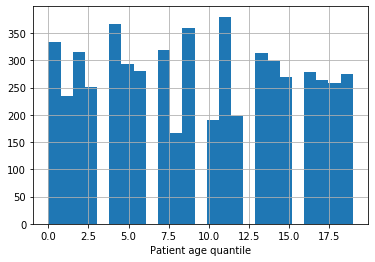

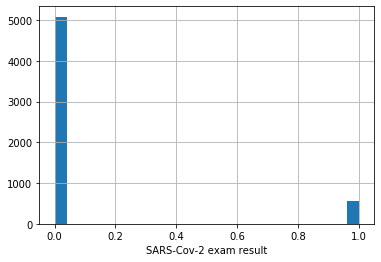

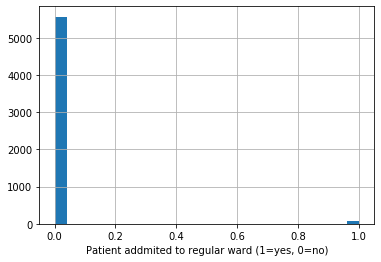

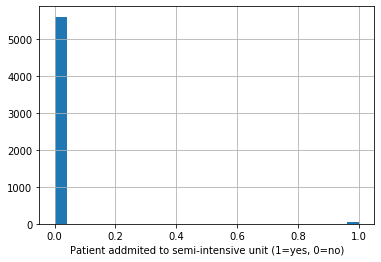

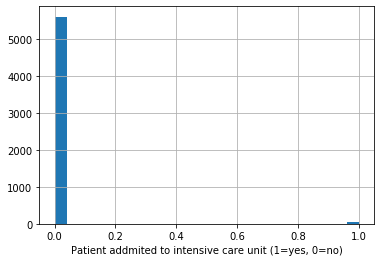

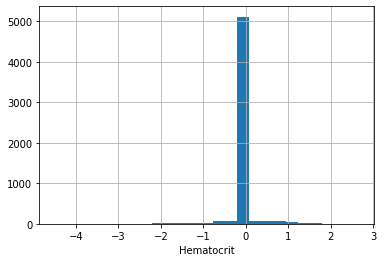

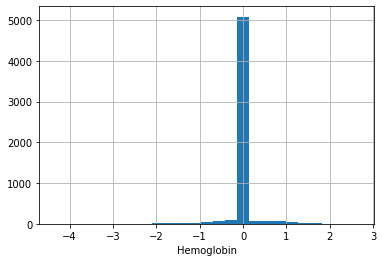

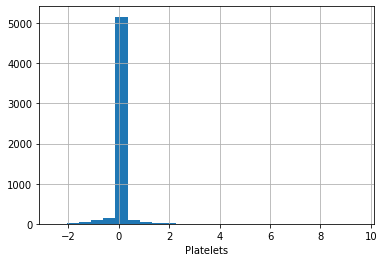

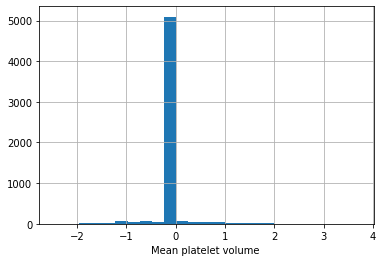

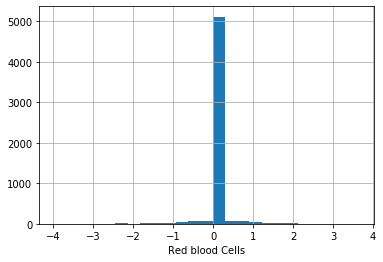

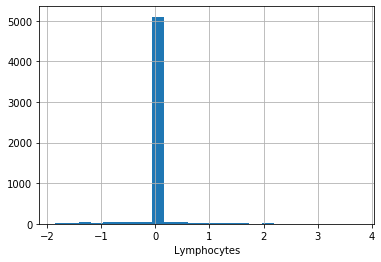

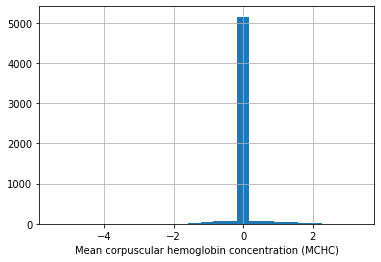

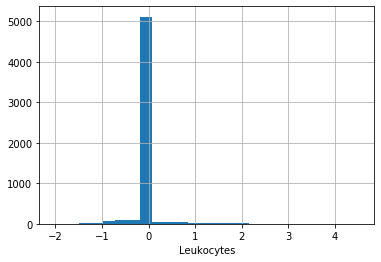

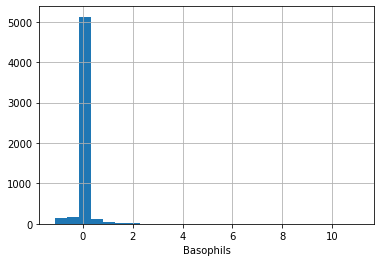

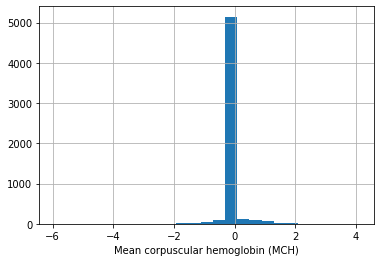

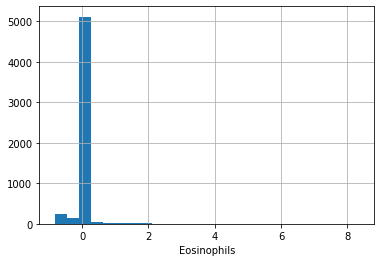

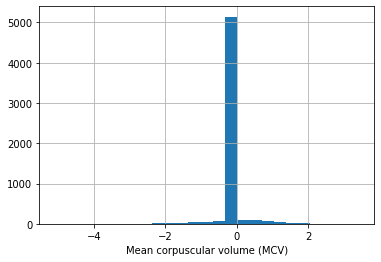

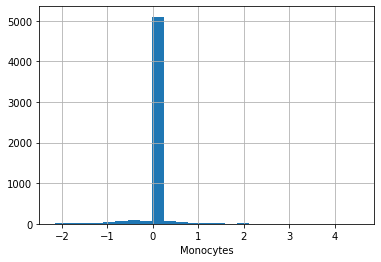

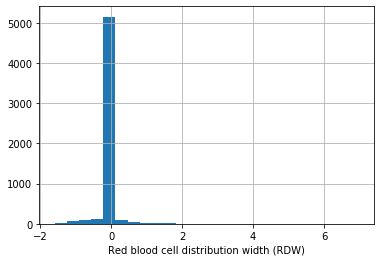

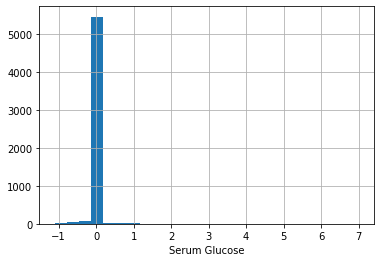

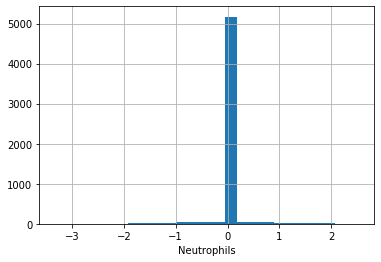

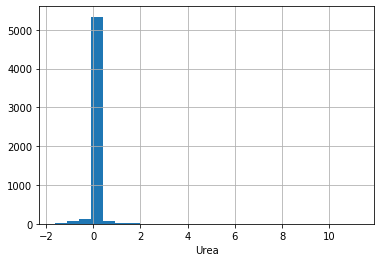

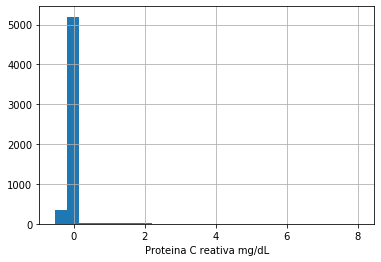

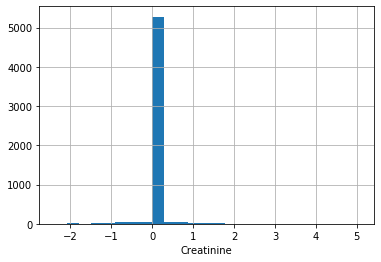

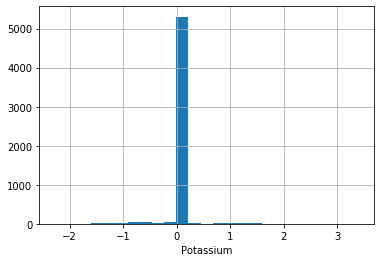

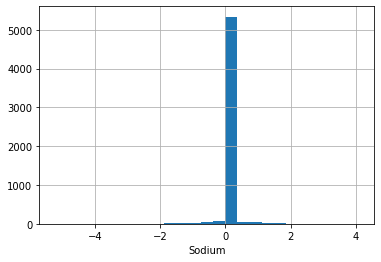

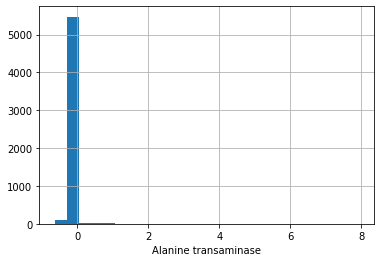

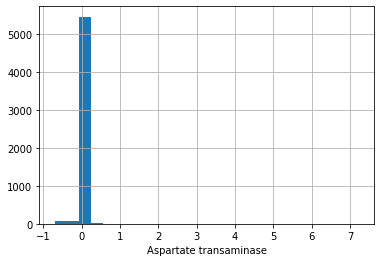

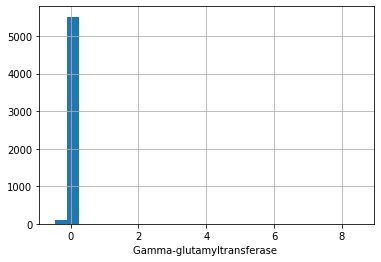

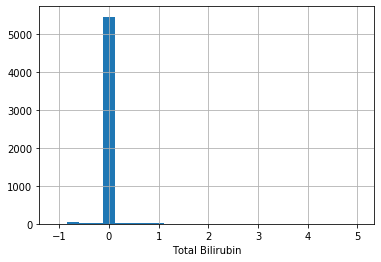

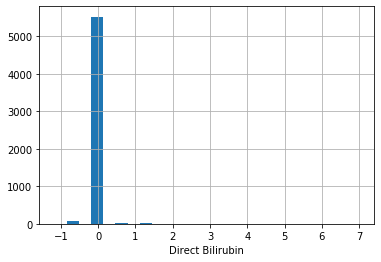

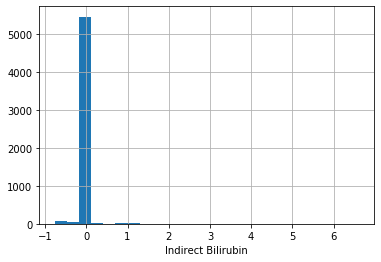

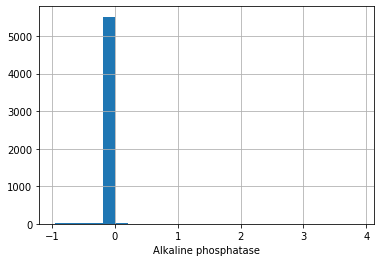

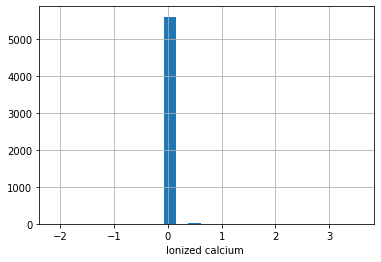

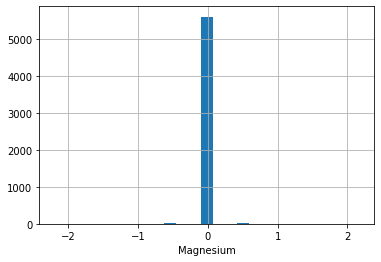

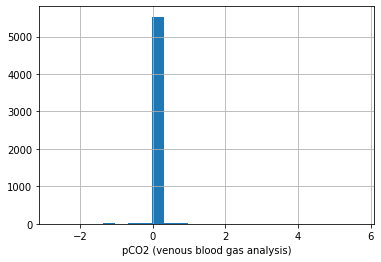

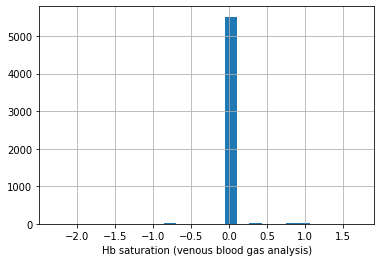

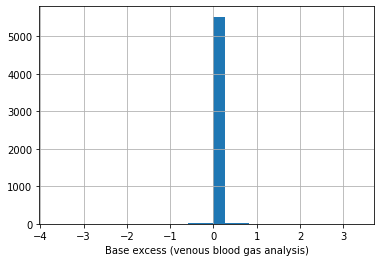

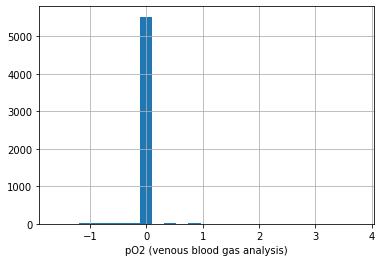

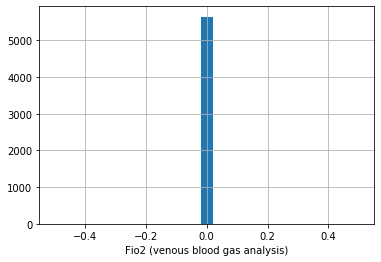

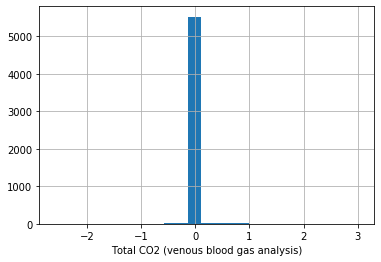

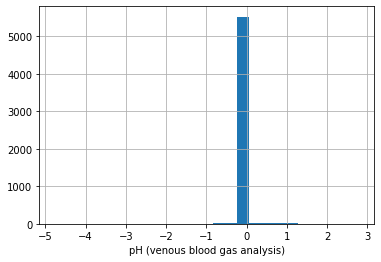

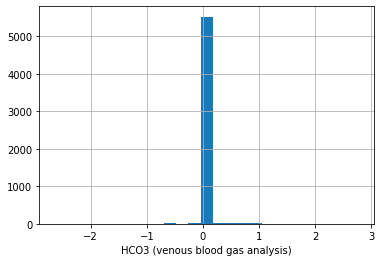

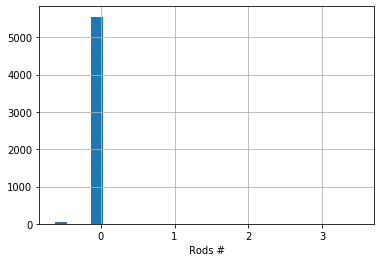

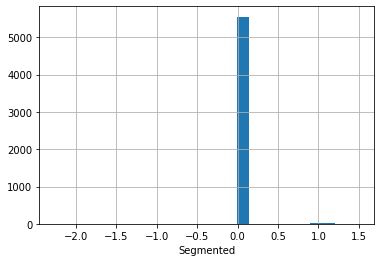

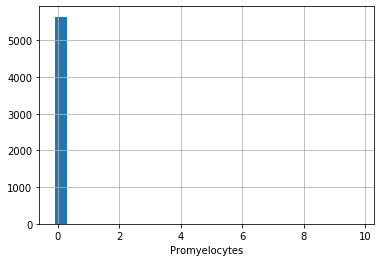

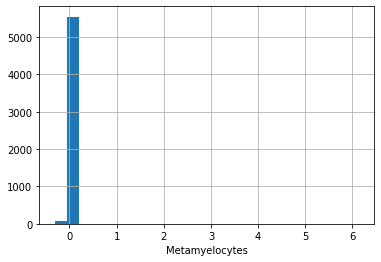

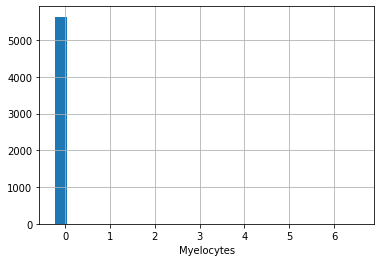

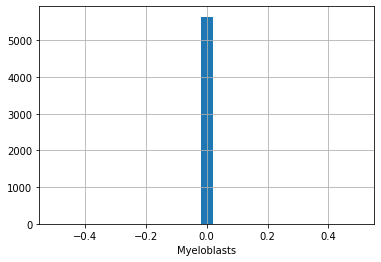

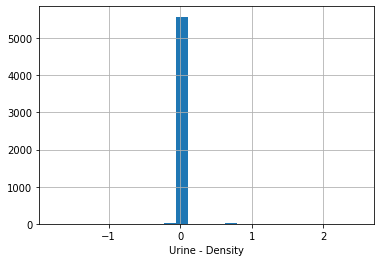

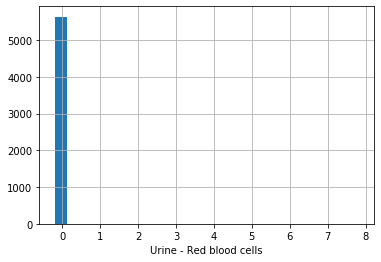

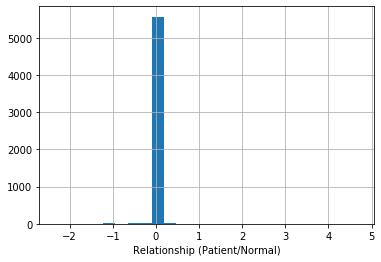

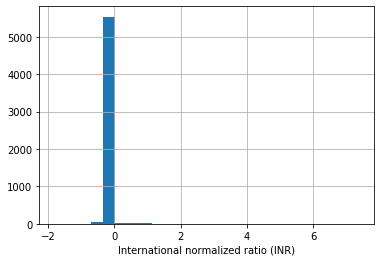

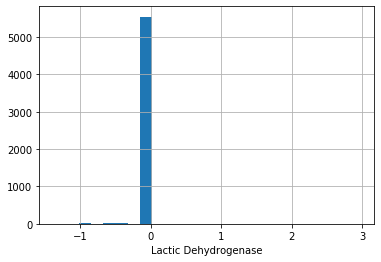

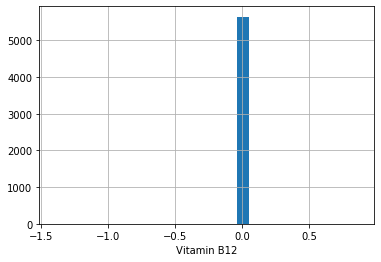

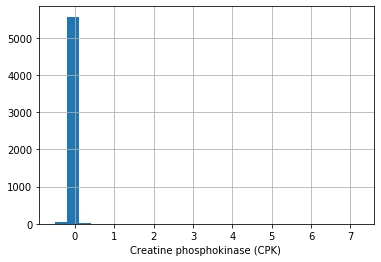

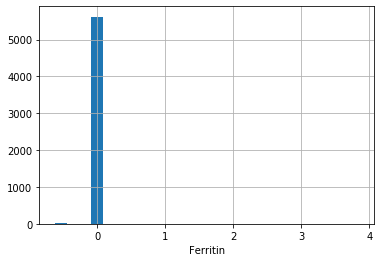

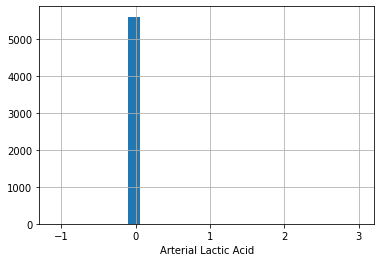

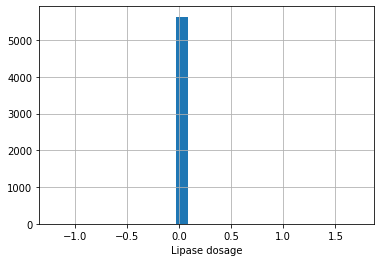

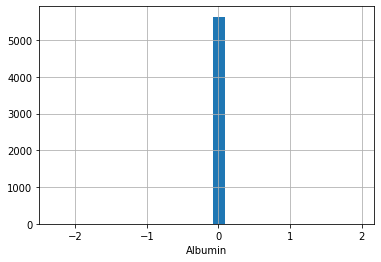

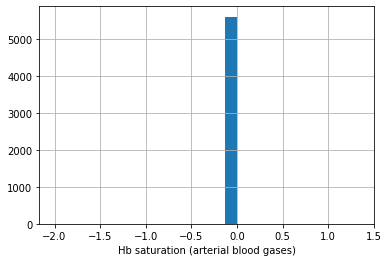

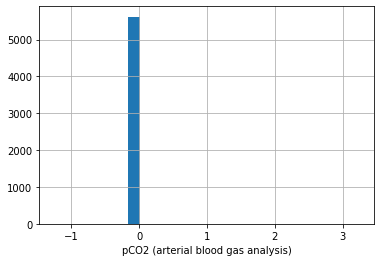

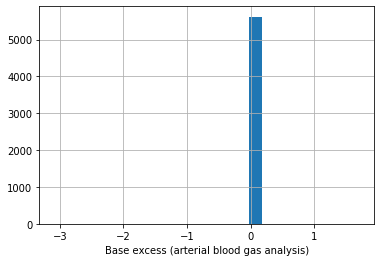

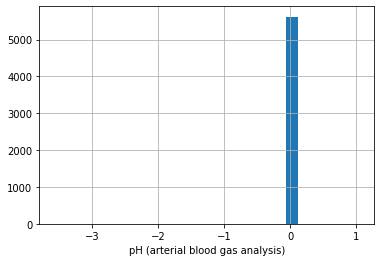

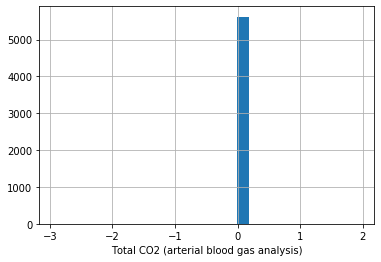

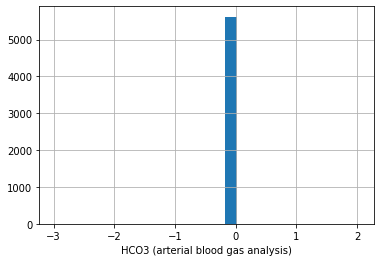

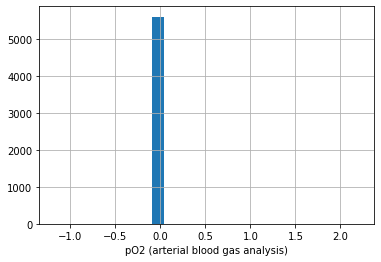

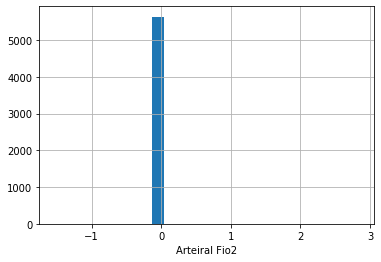

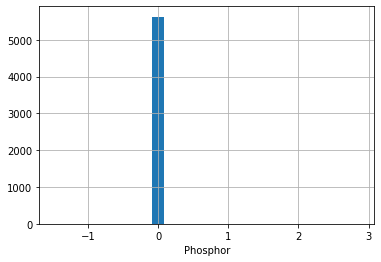

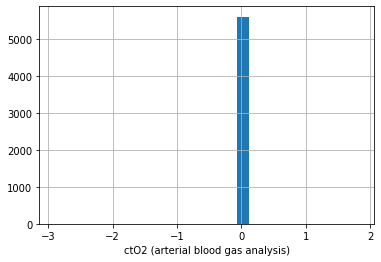

In [244]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

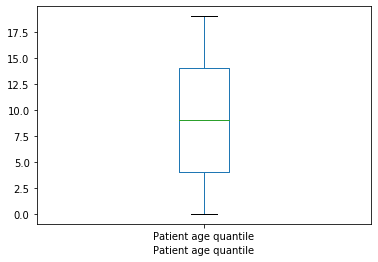

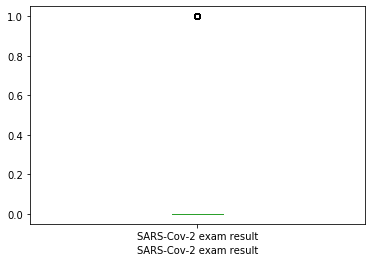

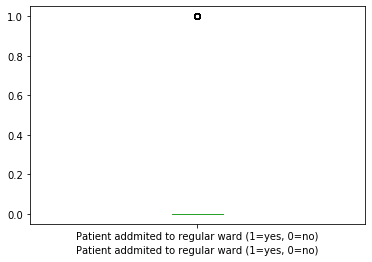

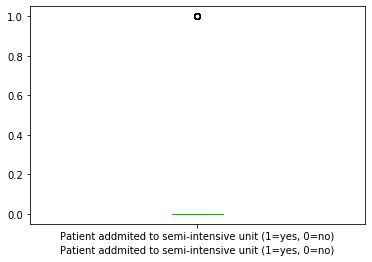

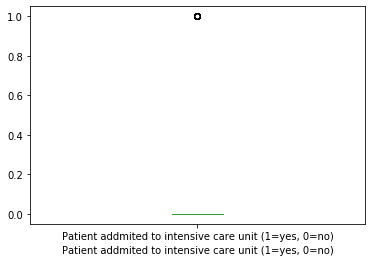

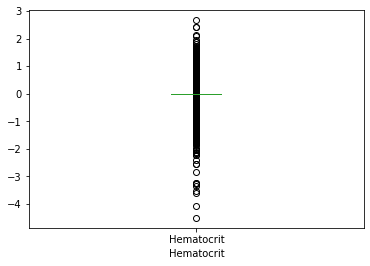

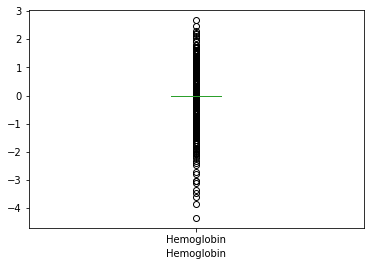

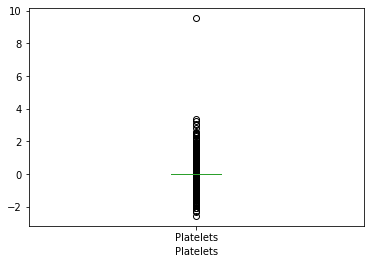

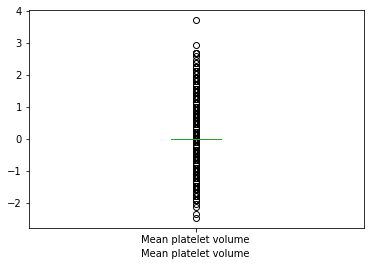

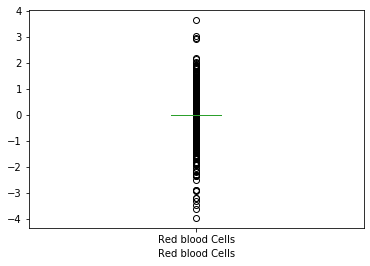

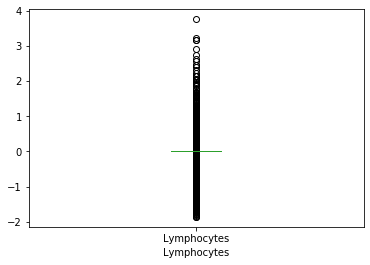

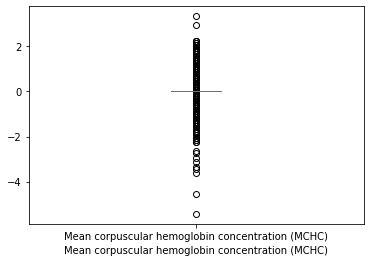

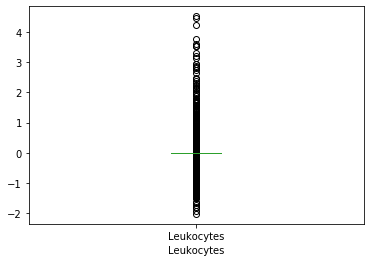

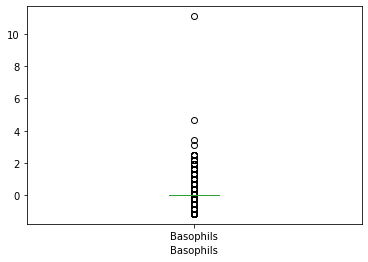

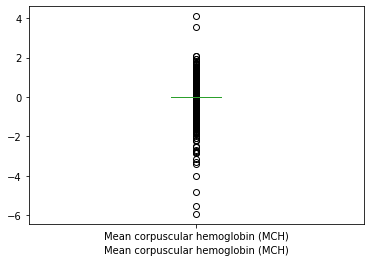

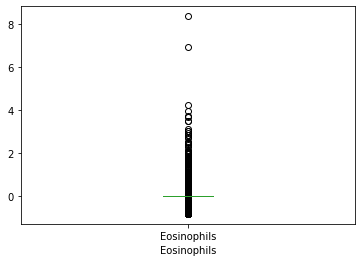

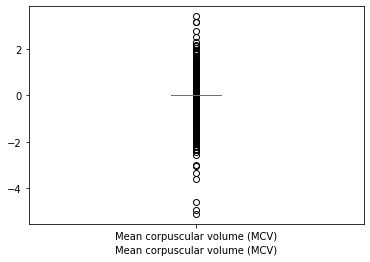

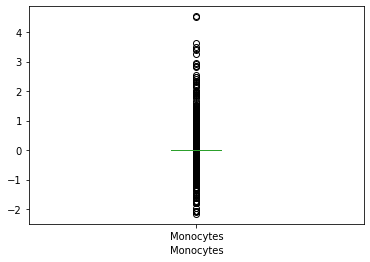

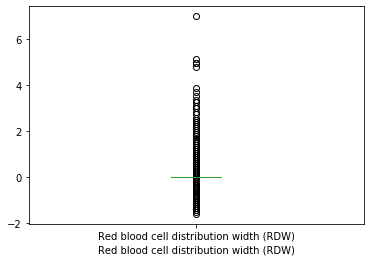

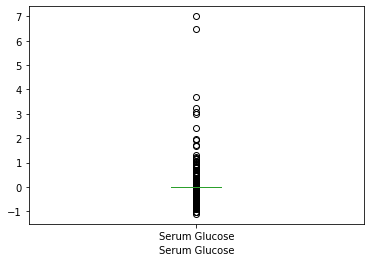

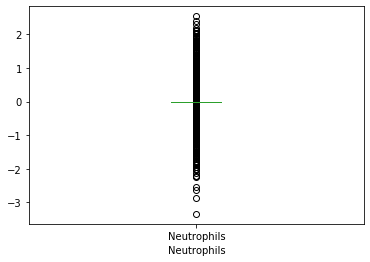

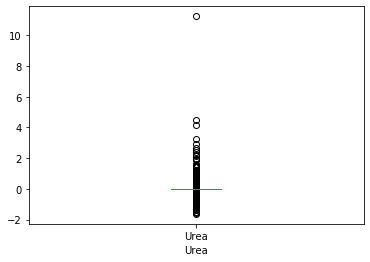

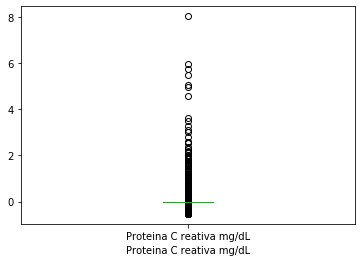

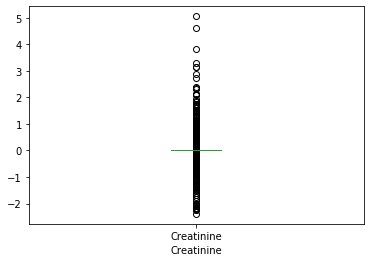

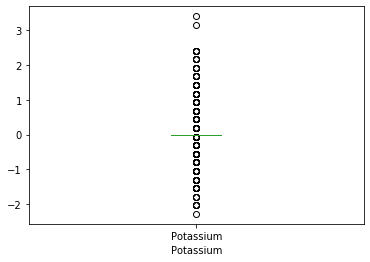

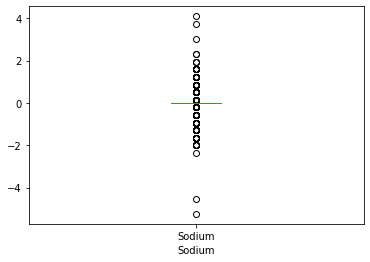

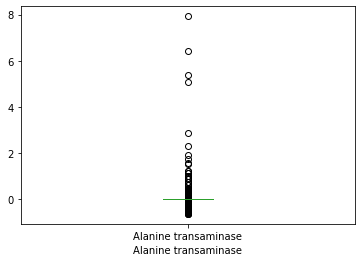

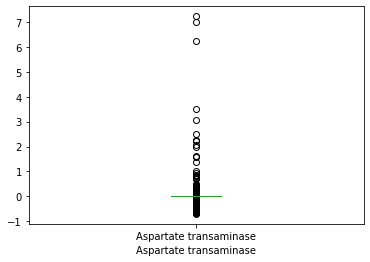

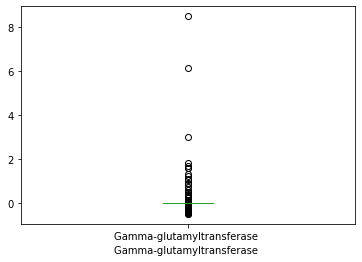

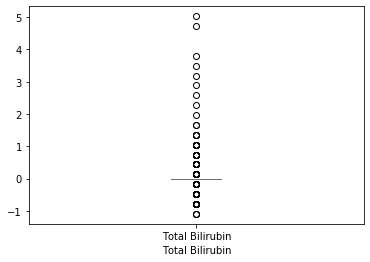

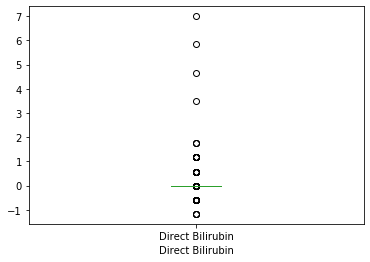

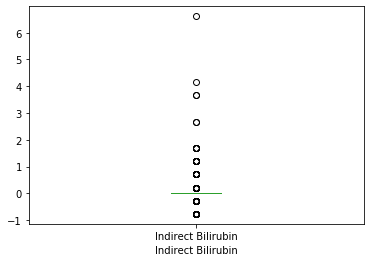

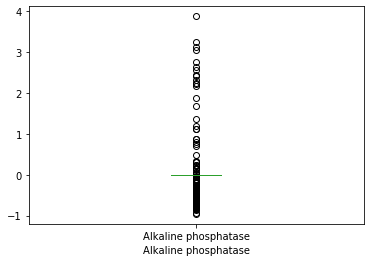

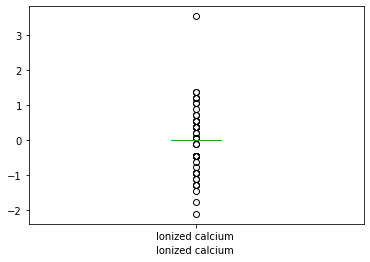

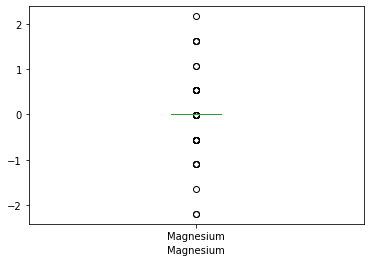

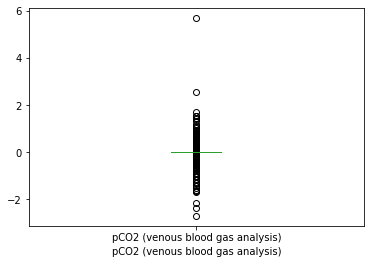

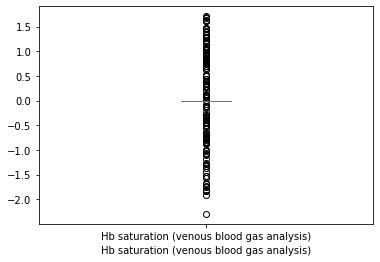

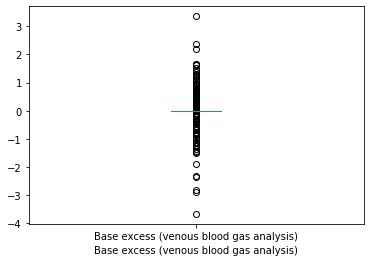

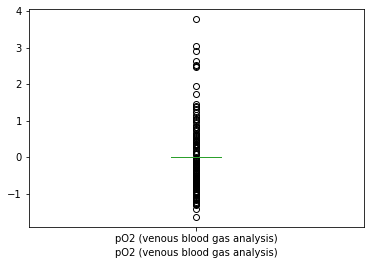

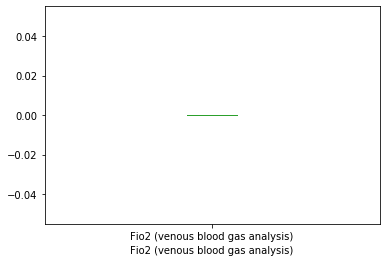

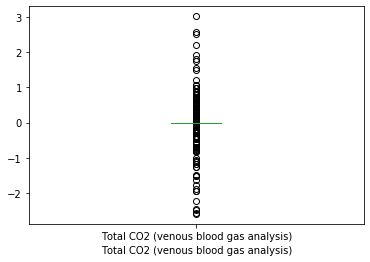

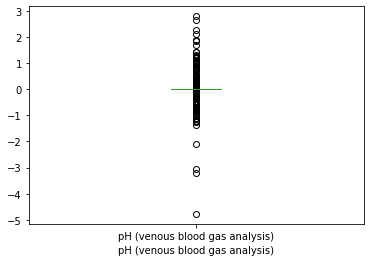

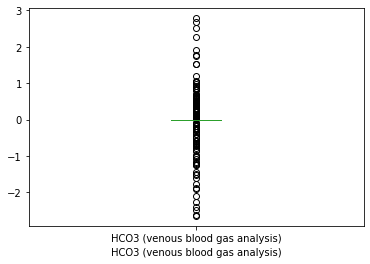

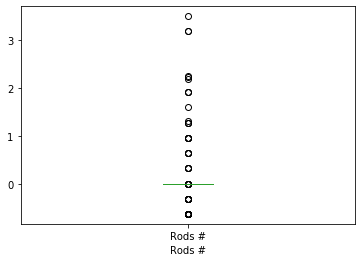

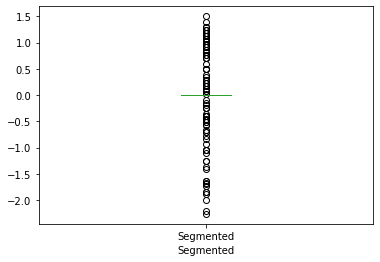

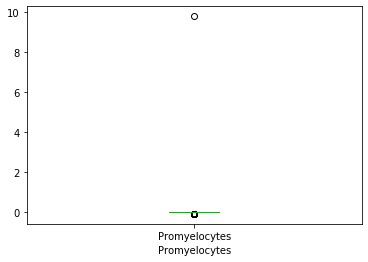

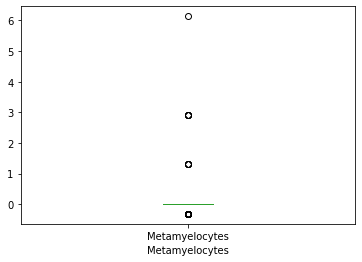

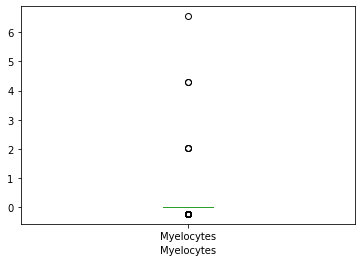

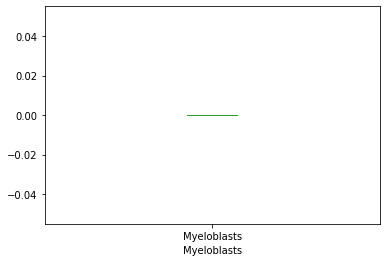

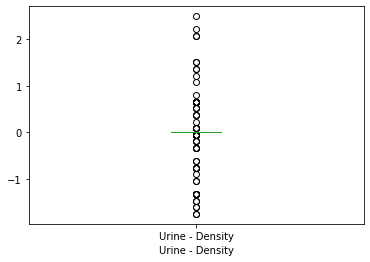

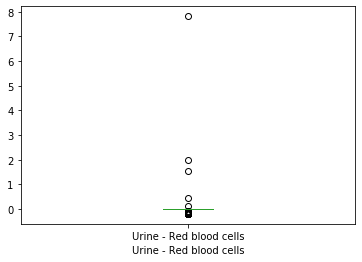

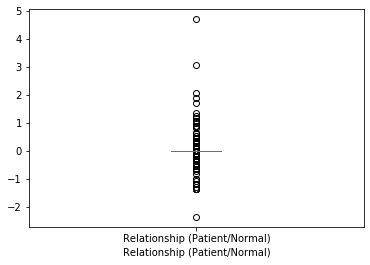

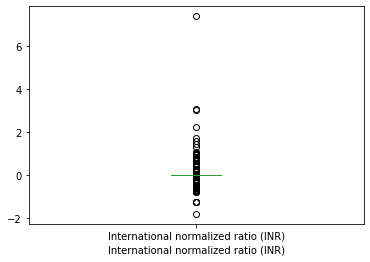

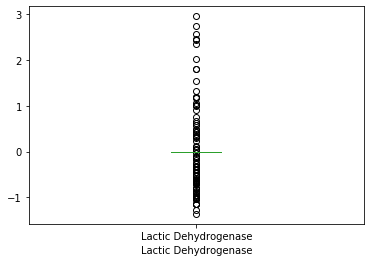

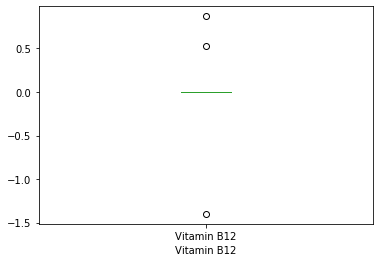

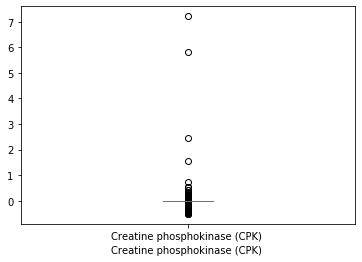

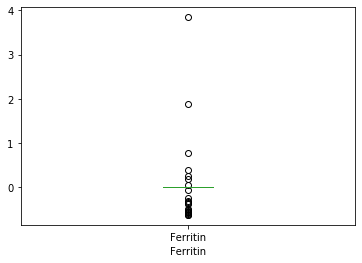

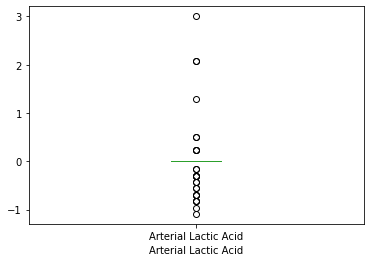

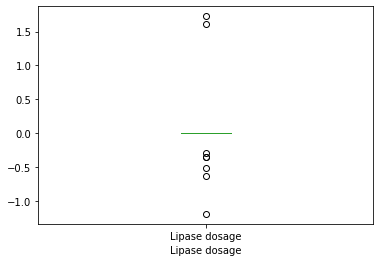

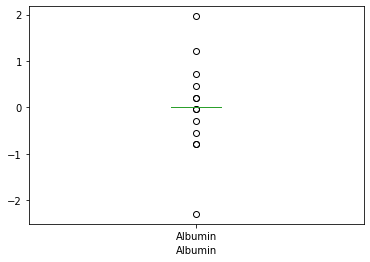

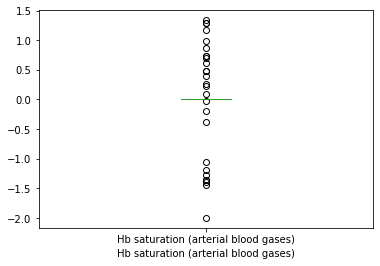

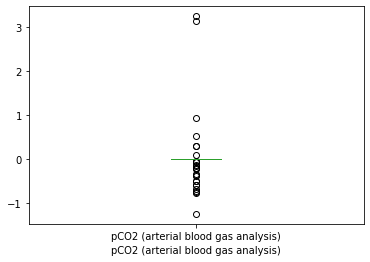

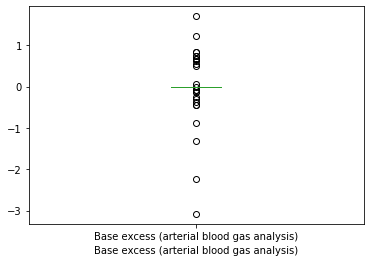

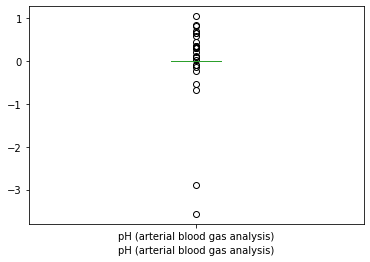

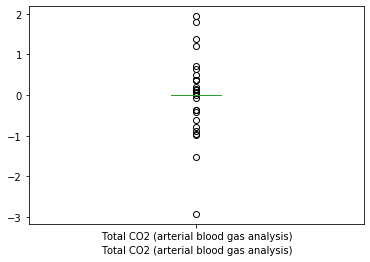

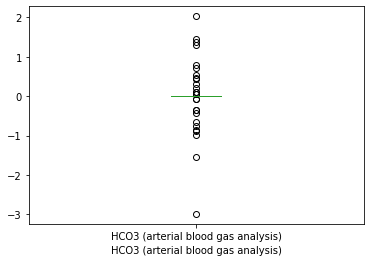

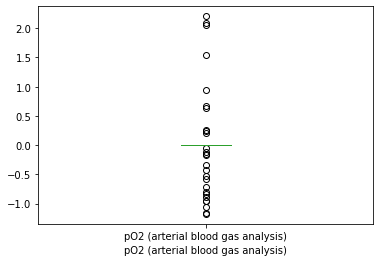

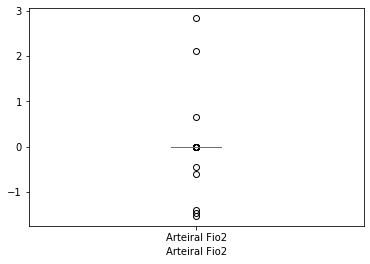

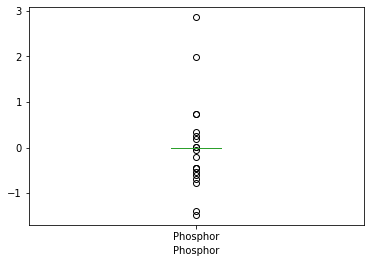

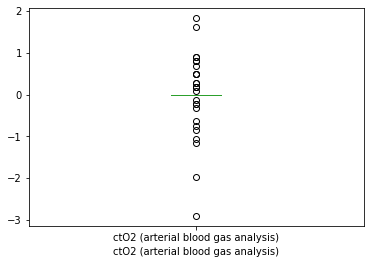

In [245]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Feature Engineering part-2

In [246]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features:
    if df[feature].nunique()>=2:
        print(feature,df[feature].nunique())

Respiratory Syncytial Virus 2
Influenza A 2
Influenza B 2
Parainfluenza 1 2
CoronavirusNL63 2
Rhinovirus/Enterovirus 2
Coronavirus HKU1 2
Parainfluenza 3 2
Chlamydophila pneumoniae 2
Adenovirus 2
Parainfluenza 4 2
Coronavirus229E 2
CoronavirusOC43 2
Inf A H1N1 2009 2
Bordetella pertussis 2
Metapneumovirus 2
Influenza B, rapid test 2
Influenza A, rapid test 2
Strepto A 3
Urine - Esterase 2
Urine - Aspect 4
Urine - pH 11
Urine - Hemoglobin 3
Urine - Bile pigments 2
Urine - Ketone Bodies 2
Urine - Urobilinogen 2
Urine - Protein 2
Urine - Leukocytes 31
Urine - Crystals 5
Urine - Color 4


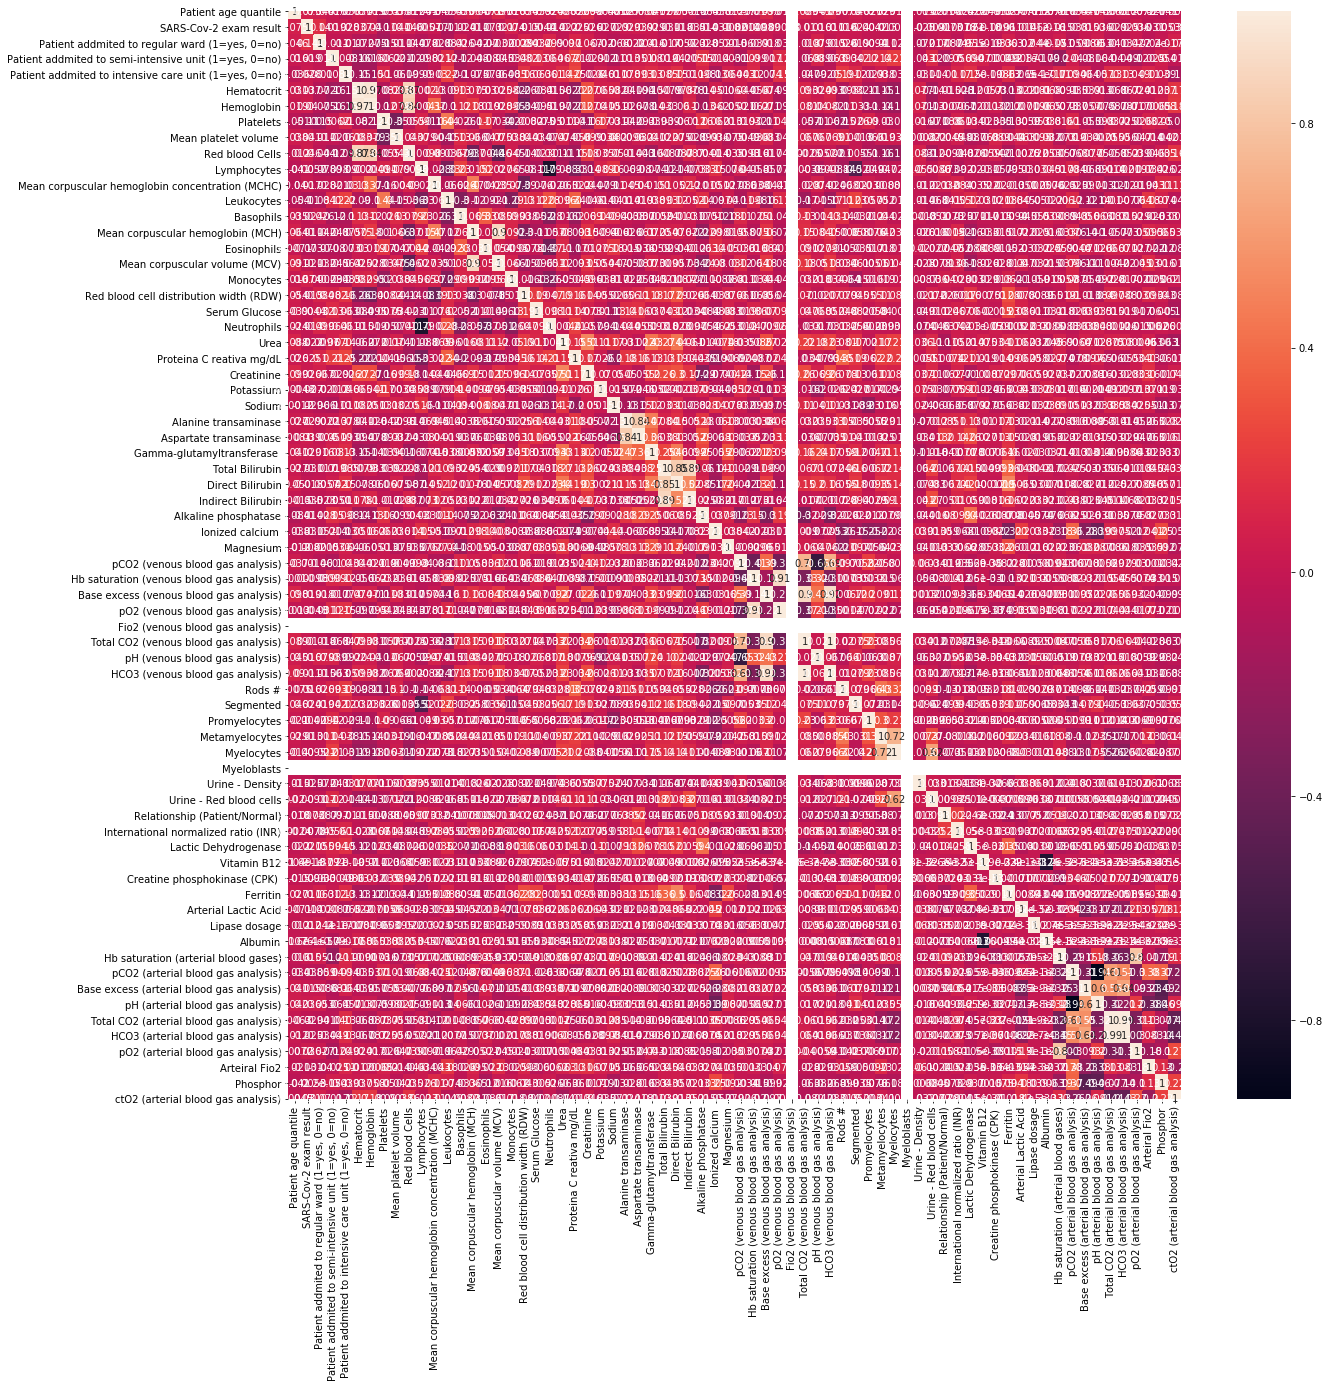

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Coverting to dummies

In [247]:
df=pd.get_dummies(df)

In [248]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Red blood cells,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Respiratory Syncytial Virus_detected,Respiratory Syncytial Virus_not_detected,Influenza A_detected,Influenza A_not_detected,Influenza B_detected,Influenza B_not_detected,Parainfluenza 1_detected,Parainfluenza 1_not_detected,CoronavirusNL63_detected,CoronavirusNL63_not_detected,Rhinovirus/Enterovirus_detected,Rhinovirus/Enterovirus_not_detected,Coronavirus HKU1_detected,Coronavirus HKU1_not_detected,Parainfluenza 3_detected,Parainfluenza 3_not_detected,Chlamydophila pneumoniae_detected,Chlamydophila pneumoniae_not_detected,Adenovirus_detected,Adenovirus_not_detected,Parainfluenza 4_detected,Parainfluenza 4_not_detected,Coronavirus229E_detected,Coronavirus229E_not_detected,CoronavirusOC43_detected,CoronavirusOC43_not_detected,Inf A H1N1 2009_detected,Inf A H1N1 2009_not_detected,Bordetella pertussis_detected,Bordetella pertussis_not_detected,Metapneumovirus_detected,Metapneumovirus_not_detected,Parainfluenza 2_not_detected,"Influenza B, rapid test_negative","Influenza B, rapid test_positive","Influenza A, rapid test_negative","Influenza A, rapid test_positive",Strepto A_negative,Strepto A_not_done,Strepto A_positive,Urine - Esterase_absent,Urine - Esterase_not_done,Urine - Aspect_altered_coloring,Urine - Aspect_clear,Urine - Aspect_cloudy,Urine - Aspect_lightly_cloudy,Urine - pH_5,Urine - pH_5.0,Urine - pH_5.5,Urine - pH_6,Urine - pH_6.0,Urine - pH_6.5,Urine - pH_7,Urine - pH_7.0,Urine - pH_7.5,Urine - pH_8.0,Urine - pH_Não Realizado,Urine - Hemoglobin_absent,Urine - Hemoglobin_not_done,Urine - Hemoglobin_present,Urine - Bile pigments_absent,Urine - Bile pigments_not_done,Urine - Ketone Bodies_absent,Urine - Ketone Bodies_not_done,Urine - Nitrite_not_done,Urine - Urobilinogen_normal,Urine - Urobilinogen_not_done,Urine - Protein_absent,Urine - Protein_not_done,Urine - Leukocytes_1000,Urine - Leukocytes_10000,Urine - Leukocytes_10600,Urine - Leukocytes_124000,Urine - Leukocytes_16000,Urine - Leukocytes_19000,Urine - Leukocytes_2000,Urine - Leukocytes_22000,Urine - Leukocytes_229000,Urine - Leukocytes_23000,Urine - Leukocytes_2500,Urine - Leukocytes_2600,Urine - Leukocytes_28000,Urine - Leukocytes_29000,Urine - Leukocytes_3000,Urine - Leukocytes_32000,Urine - Leukocytes_3310000,Urine - Leukocytes_38000,Urine - Leukocytes_4000,Urine - Leukocytes_40000,Urine - Leukocytes_43000,Urine - Leukocytes_4600,Urine - Leukocytes_5000,Urine - Leukocytes_

In [249]:
df.shape

(5644, 182)

In [250]:
df.to_csv('E:\\cleanedcovidbrazil.csv',index=False)

# Separating target and independent variables

In [251]:
y=df['SARS-Cov-2 exam result']
X=df.drop(['SARS-Cov-2 exam result'],axis=1)

In [252]:
X.shape

(5644, 181)

# PCA

In [253]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
df_pca50=pca.fit_transform(X)
df=pd.DataFrame(df_pca50)

# Skewness treatment

In [254]:
df.skew()

0      0.034511
1      2.915183
2      0.104097
3      1.614270
4      5.353309
        ...    
95    10.383814
96    16.016205
97     2.000234
98    -1.253428
99    -0.249600
Length: 100, dtype: float64

# Applying Power transformation to remove skewness

In [255]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
df=pt.fit_transform(df)
df=pd.DataFrame(df)

In [256]:
df.skew()

0     0.008347
1    -0.273582
2    -0.038678
3    -0.131762
4    -0.256430
        ...   
95   -2.145924
96   -3.482377
97   -0.485439
98    0.467411
99    0.103203
Length: 100, dtype: float64

In [257]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.643292,0.045257,-0.022148,0.065478,-0.038973,-0.037370,-0.153817,0.003964,0.013159,0.046258,-0.033710,-0.018284,0.004698,0.017148,-0.031999,0.013751,-0.026843,0.024360,-0.013249,-0.007133,-0.060258,-0.000795,0.017136,-0.005333,0.029197,0.073664,0.036689,0.019641,0.048236,-0.022651,0.026924,-0.007878,0.027359,-0.038235,-0.073556,0.003382,-0.003994,0.037083,-0.004648,-0.016478,-0.037761,-0.037463,0.015997,0.032947,0.045879,0.001125,-0.046814,0.015247,0.001787,0.030095,0.046755,-0.033909,-0.015100,0.020748,0.064213,0.056219,0.025205,-0.046933,0.042049,0.011751,0.015100,-0.019811,0.007580,0.037057,0.013646,0.028556,0.072534,0.018102,-0.018323,-0.016914,-0.007009,-0.014278,0.022775,-0.016184,0.012984,0.004938,0.032007,0.026806,0.020286,0.006693,0.025849,-0.691059,-0.000803,0.026191,-0.008452,0.031103,0.034254,0.223797,-0.001995,0.020370,0.000941,0.015661,-0.002913,-0.009947,0.004513,0.013318,-0.001339,0.000964,0.010338,-0.006396
1,1.322421,-1.083623,0.904846,0.907622,2.507281,3.058269,2.398622,-0.895083,-0.614317,-1.626463,3.496744,-4.716609,1.617829,-3.098852,3.932768,-0.066720,1.149264,1.846574,0.929021,-5.222928,-1.675700,-1.649532,-2.713260,0.982965,-1.300187,1.244722,-0.626286,-0.907784,1.532460,0.103219,-2.015699,3.270135,0.183061,-0.010623,-1.791062,-1.608810,-2.356017,-0.569297,-0.342592,1.614822,0.217263,0.664491,-1.817505,2.559418,-0.117233,-1.556142,-1.571898,0.754732,-0.194576,-0.639972,-0.804935,-0.157982,-0.582970,0.541167,-0.888663,-1.714487,-0.108629,1.535345,0.060735,0.893344,1.468992,0.458821,-2.180691,0.755617,-2.519321,1.236694,1.543107,0.095999,0.014805,-1.320197,0.445376,-0.181497,0.283728,0.513354,-1.458717,-1.511476,-0.021310,0.142051,-0.464478,-0.710709,0.440390,0.322380,0.045954,0.685122,-0.154630,0.162537,-0.051515,1.204277,-0.310258,0.409265,0.380702,0.228825,-0.559375,-0.247350,0.063842,0.004837,0.528088,0.850309,-0.513656,0.203604
2,-0.216270,0.025023,0.014886,0.001403,0.070713,-0.008200,-0.196732,0.056178,-0.009077,0.079012,-0.048031,-0.006686,0.038820,0.003411,-0.014077,0.044306,-0.015867,0.005476,0.010141,0.009039,-0.085466,-0.026520,0.060092,-0.016720,0.044921,0.105134,-0.014165,0.017534,0.027902,-0.027787,0.031972,-0.052288,0.060908,0.007781,-0.024189,-0.030487,-0.047075,0.057546,-0.054464,-0.016149,-0.019573,-0.010449,-0.047855,0.015934,-0.002423,-0.022693,-0.004155,-0.010593,-0.019549,0.008476,0.034788,0.010077,-0.010819,-0.001592,0.025216,0.072271,0.020398,-0.007517,0.025041,-0.006732,0.002823,0.005324,0.035212,0.053743,0.029467,0.024715,0.032395,0.013963,-0.004214,-0.019484,0.008990,0.002675,0.011668,0.003544,0.010324,-0.004679,0.016529,0.011041,0.006920,0.001055,-0.002329,-0.001306,0.004916,0.001486,0.013018,-0.003086,0.025241,-0.213143,-0.012483,0.020886,-0.003332,0.000592,0.012707,-0.006570,-0.003384,0.008296,0.017067,-0.012154,-0.002484,-0.000246
3,-0.743443,0.012858,0.037103,-0.037151,0.135945,0.009268,-0.222691,0.087579,-0.022415,0.098650,-0.056623,0.000272,0.059259,-0.004832,-0.003329,0.062642,-0.009282,-0.005859,0.024167,0.018741,-0.100629,-0.041976,0.085892,-0.023555,0.054353,0.124043,-0.044783,0.016270,0.015691,-0.030870,0.035000,-0.078991,0.081042,0.035392,0.005561,-0.050810,-0.073014,0.069842,-0.084371,-0.015951,-0.008656,0.005726,-0.086535,0.005723,-0.031410,-0.036990,0.021387,-0.026098,-0.032378,-0.004508,0.027608,0.036408,-0.008251,-0.015005,0.001731,0.081897,0.017514,0.016154,0.014838,-0.017823,-0.004543,0.020394,0.051752,0.063742,0.038944,0.022410,0.008221,0.011479,0.004251,-0.021026,0.018589,0.012848,0.005001,0.015379,0.008728,-0.010449,0.007241,0.001580,-0.001100,-0.002328,-0.019234,0.392279,0.008347,-0.013349,0.025900,-0.023598,0.019833,-0.480393,-0.018777,0.021195,-0.005896,-0.008448

# Scaling the data

In [258]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df)

# Model building

In [259]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [260]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [261]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [262]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [263]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.9050318922749823


cross_val_score  - 0.889787083545562


roc_auc_score  - 0.5404138952988552


Recall_score  - 0.08633093525179857


classification report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1272
           1       0.63      0.09      0.15       139

    accuracy                           0.91      1411
   macro avg       0.77      0.54      0.55      1411
weighted avg       0.88      0.91      0.87      1411



[[1265    7]
 [ 127   12]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated'

cross_val_score  - 0.9014842046718948


roc_auc_score  - 0.5396277317768426


Recall_score  - 0.08633093525179857


classification report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1272
           1       0.57      0.09      0.15       139

    accuracy                           0.90      1411
   macro avg       0.74      0.54      0.55      1411
weighted avg       0.88      0.90      0.87      1411



[[1263    9]
 [ 127   12]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





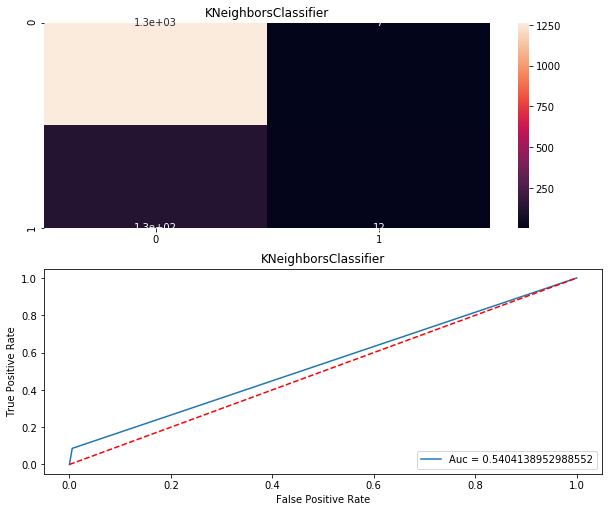

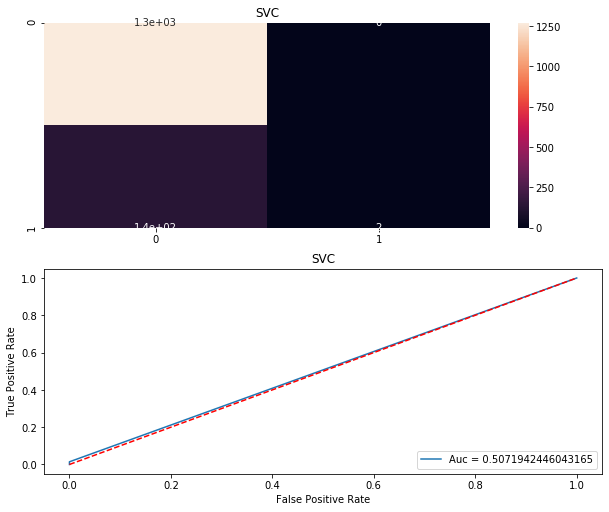

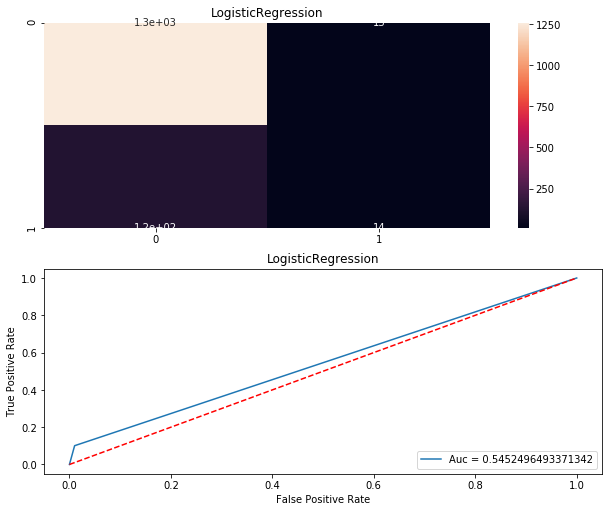

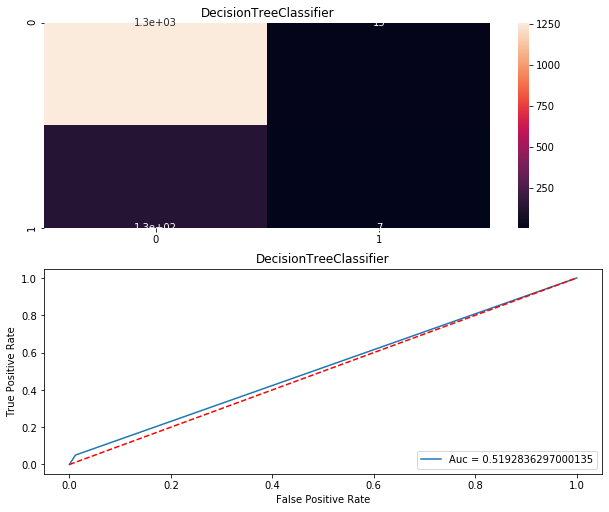

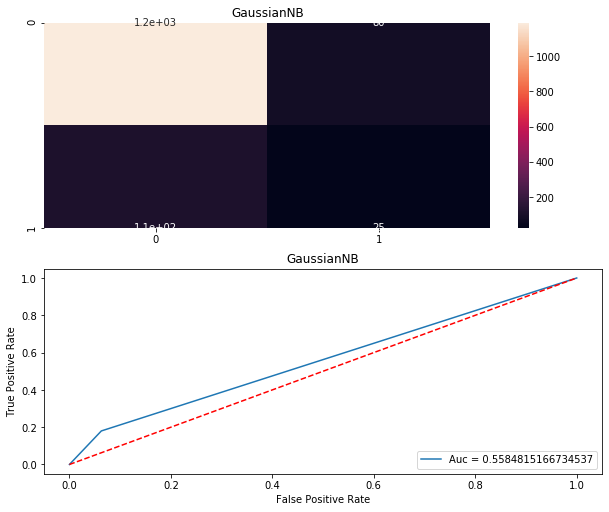

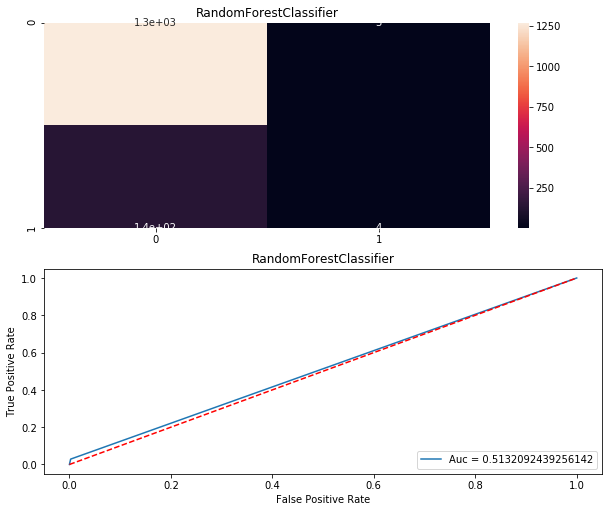

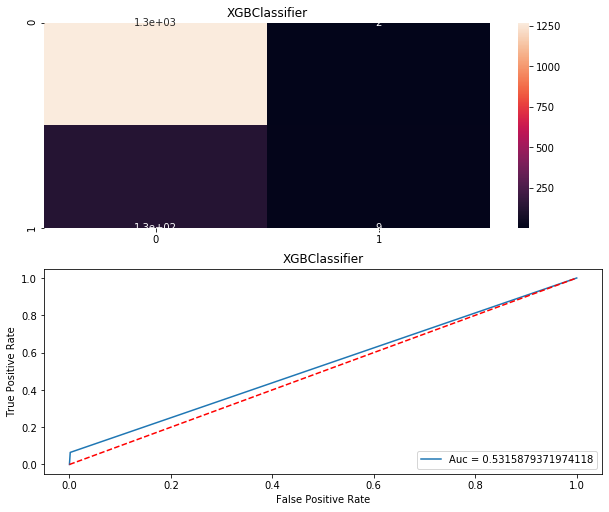

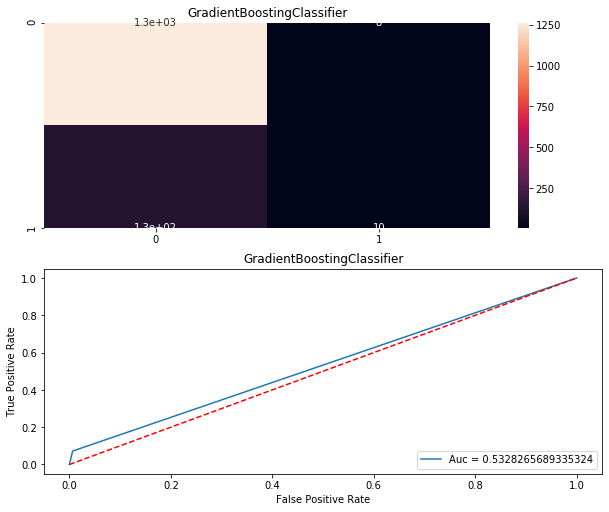

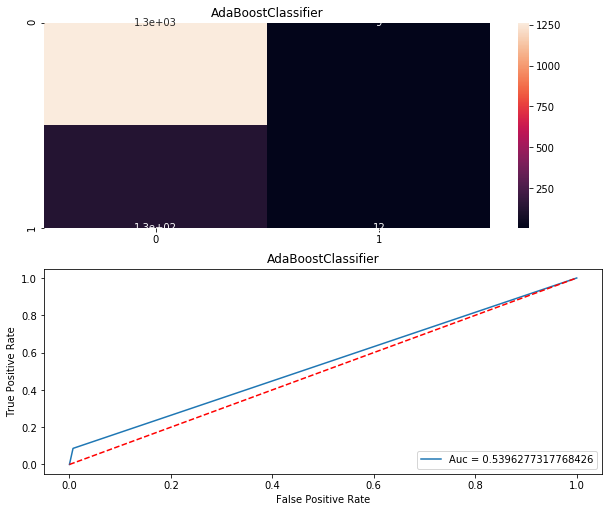

In [42]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    
    
    
    

In [43]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,90.503189,88.978708
1,SVC,90.290574,90.148672
2,LogisticRegression,90.219702,89.776079
3,DecisionTreeClassifier,89.581857,89.421846
4,GaussianNB,86.250886,85.203641
5,RandomForestClassifier,90.219702,90.059799
6,XGBClassifier,90.644933,90.449745
7,GradientBoostingClassifier,90.290574,90.307776
8,AdaBoostClassifier,90.361446,90.148420


In [ ]:
#hence XGBClassifier is the best performing Algorithm .Even cross_val_score is high.
#not doing gridsearchcv.As we have achieved our target of 90% accuracy.

# Finding the best random_state for all models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [ ]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

# Saving the final XGBClassifier model

In [264]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68)
xgb=XGBClassifier()

In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68)
xgb=XGBClassifier()
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   0.9184975194897236


In [266]:
#Cross validating the model and checking the cross_val_score,model giving highest score is choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier()
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9044974543155234


array([[5069,  525],
       [  17,   33]], dtype=int64)

In [267]:
from sklearn.externals import joblib
joblib.dump(xgb,'project20-covid_brazil.obj')

['project20-covid_brazil.obj']

In [268]:
model=joblib.load('project20-covid_brazil.obj')

In [269]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['SARS-Cov-2 exam result'])
final_predictions.head()

,SARS-Cov-2 exam result
0,0
1,0
2,0
3,0
4,0


In [270]:
final_predictions.sample(n=10)

,SARS-Cov-2 exam result
1288,0
1180,0
1241,0
677,0
668,0
1368,0
1047,0
511,0
795,0
693,0


# Saving final predictions in file.csv 

In [271]:
final_predictions.to_csv('E:\\final_predictionsSARS-Cov-2 exam result.csv',index=False)

# Conclusion:-

# Task 2-Classification -->target='target'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict

#from mlxtend.classifier import StackingClassifier

from sklearn.externals import joblib



In [149]:
df=pd.read_csv('E:\\cleanedcovidbrazil.csv')
pd.set_option('display.max_columns',None)

In [150]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Red blood cells,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Respiratory Syncytial Virus_detected,Respiratory Syncytial Virus_not_detected,Influenza A_detected,Influenza A_not_detected,Influenza B_detected,Influenza B_not_detected,Parainfluenza 1_detected,Parainfluenza 1_not_detected,CoronavirusNL63_detected,CoronavirusNL63_not_detected,Rhinovirus/Enterovirus_detected,Rhinovirus/Enterovirus_not_detected,Coronavirus HKU1_detected,Coronavirus HKU1_not_detected,Parainfluenza 3_detected,Parainfluenza 3_not_detected,Chlamydophila pneumoniae_detected,Chlamydophila pneumoniae_not_detected,Adenovirus_detected,Adenovirus_not_detected,Parainfluenza 4_detected,Parainfluenza 4_not_detected,Coronavirus229E_detected,Coronavirus229E_not_detected,CoronavirusOC43_detected,CoronavirusOC43_not_detected,Inf A H1N1 2009_detected,Inf A H1N1 2009_not_detected,Bordetella pertussis_detected,Bordetella pertussis_not_detected,Metapneumovirus_detected,Metapneumovirus_not_detected,Parainfluenza 2_not_detected,"Influenza B, rapid test_negative","Influenza B, rapid test_positive","Influenza A, rapid test_negative","Influenza A, rapid test_positive",Strepto A_negative,Strepto A_not_done,Strepto A_positive,Urine - Esterase_absent,Urine - Esterase_not_done,Urine - Aspect_altered_coloring,Urine - Aspect_clear,Urine - Aspect_cloudy,Urine - Aspect_lightly_cloudy,Urine - pH_5,Urine - pH_5.0,Urine - pH_5.5,Urine - pH_6,Urine - pH_6.0,Urine - pH_6.5,Urine - pH_7,Urine - pH_7.0,Urine - pH_7.5,Urine - pH_8.0,Urine - pH_Não Realizado,Urine - Hemoglobin_absent,Urine - Hemoglobin_not_done,Urine - Hemoglobin_present,Urine - Bile pigments_absent,Urine - Bile pigments_not_done,Urine - Ketone Bodies_absent,Urine - Ketone Bodies_not_done,Urine - Nitrite_not_done,Urine - Urobilinogen_normal,Urine - Urobilinogen_not_done,Urine - Protein_absent,Urine - Protein_not_done,Urine - Leukocytes_1000,Urine - Leukocytes_10000,Urine - Leukocytes_10600,Urine - Leukocytes_124000,Urine - Leukocytes_16000,Urine - Leukocytes_19000,Urine - Leukocytes_2000,Urine - Leukocytes_22000,Urine - Leukocytes_229000,Urine - Leukocytes_23000,Urine - Leukocytes_2500,Urine - Leukocytes_2600,Urine - Leukocytes_28000,Urine - Leukocytes_29000,Urine - Leukocytes_3000,Urine - Leukocytes_32000,Urine - Leukocytes_3310000,Urine - Leukocytes_38000,Urine - Leukocytes_4000,Urine - Leukocytes_40000,Urine - Leukocytes_43000,Urine - Leukocytes_4600,Urine - Leukocytes_5000,Urine - Leukocytes_

In [151]:
df['Patient addmited to semi-intensive unit (1=yes, 0=no)']=df['Patient addmited to semi-intensive unit (1=yes, 0=no)'].replace(1,2)

In [152]:
df['Patient addmited to intensive care unit (1=yes, 0=no)']=df['Patient addmited to intensive care unit (1=yes, 0=no)'].replace(1,3)

# Adding the columns to make a new target column 

In [153]:
df['target']=df['Patient addmited to regular ward (1=yes, 0=no)']+df['Patient addmited to semi-intensive unit (1=yes, 0=no)']+df['Patient addmited to intensive care unit (1=yes, 0=no)']

In [154]:
df['target'].value_counts()

0    5474
1      79
2      50
3      41
Name: target, dtype: int64

In [155]:
df=df.drop(['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'],axis=1)

In [156]:
df.shape

(5644, 180)

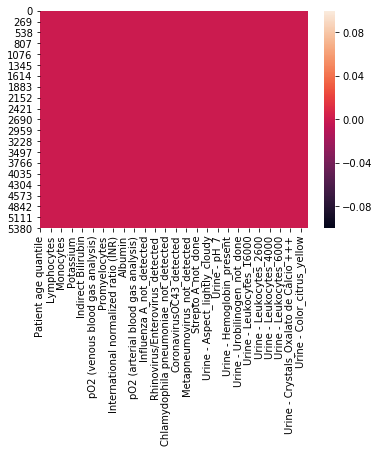

In [157]:
sns.heatmap(df.isnull())#no missing values in the dataset

# Separating training and testing dataset

In [158]:
y=df['target']
X=df.drop(['target'],axis=1)

# PCA

In [159]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
df_pca35=pca.fit_transform(X)
x=pd.DataFrame(df_pca35)

# Removing skewness

In [160]:
x.skew()

0      0.034464
1      2.850458
2      0.093954
3      1.600600
4      4.918411
        ...    
95     1.300767
96    -2.637447
97     1.257214
98     2.479918
99    74.125799
Length: 100, dtype: float64

In [161]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
x_power=pt.fit_transform(x)
x=pd.DataFrame(x_power,columns=x.columns)

In [162]:
x.skew()

0     0.008335
1    -0.254890
2    -0.039093
3    -0.135286
4    -0.225383
        ...   
95   -0.322976
96    0.794806
97   -0.339783
98   -0.657692
99   -4.808613
Length: 100, dtype: float64

# Scaling the data

In [163]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(data=x_scaled,columns=x.columns)


# Model Building

In [188]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [190]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
#gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [191]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
#models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [192]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.9702338766832034


cross_val_score  - 0.9693481680953362


classification report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1369
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        10

    accuracy                           0.97      1411
   macro avg       0.24      0.25      0.25      1411
weighted avg       0.94      0.97      0.96      1411



[[1369    0    0    0]
 [  20    0    0    0]
 [  12    0    0    0]
 [  10    0    0    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** SVC *******************


SVC(C=1.0, cache_size=200, cl

cross_val_score  - 0.9684622653386891


classification report
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1369
           1       0.00      0.00      0.00        20
           2       0.25      0.08      0.12        12
           3       0.25      0.20      0.22        10

    accuracy                           0.97      1411
   macro avg       0.37      0.32      0.33      1411
weighted avg       0.95      0.97      0.96      1411



[[1363    1    2    3]
 [  16    0    1    3]
 [  11    0    1    0]
 [   8    0    0    2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


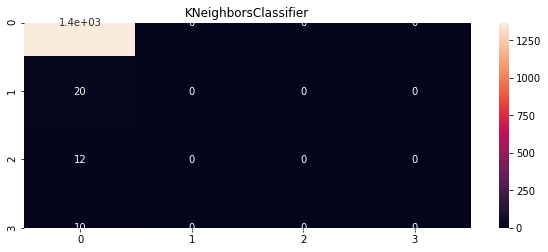

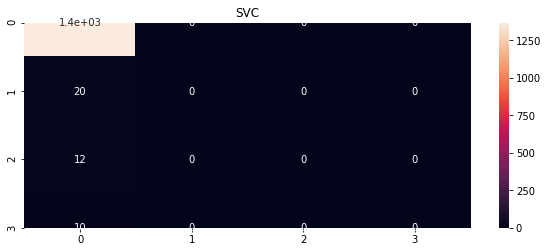

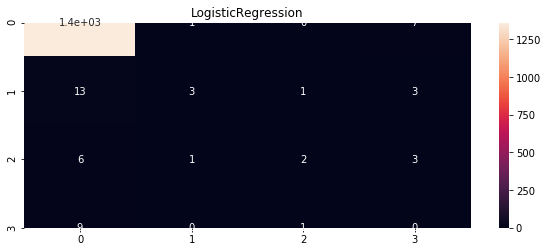

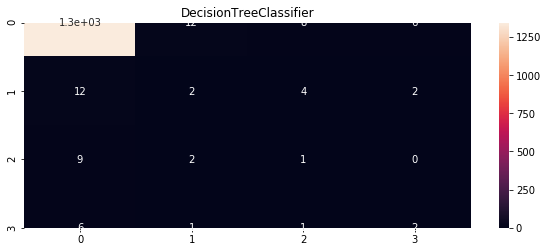

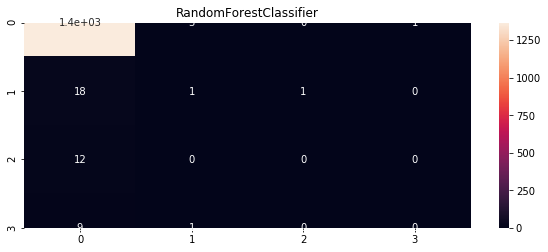

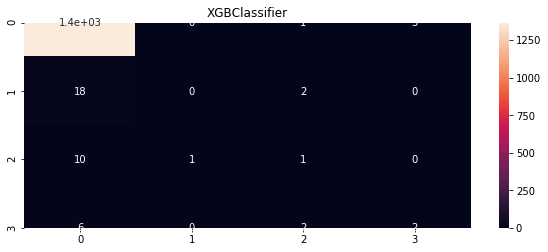

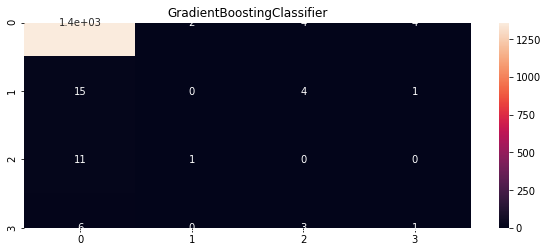

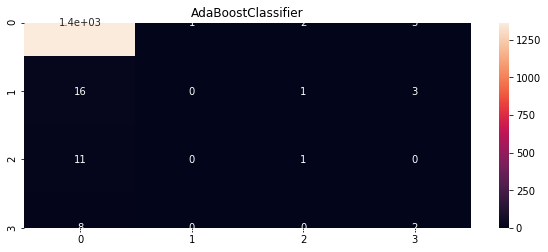

In [193]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    
    
    

In [194]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,97.023388,96.934817
1,SVC,97.023388,96.988040
2,LogisticRegression,96.810773,96.828841
3,DecisionTreeClassifier,95.535082,95.978215
4,RandomForestClassifier,96.810773,96.864083
5,XGBClassifier,96.952516,96.917023
6,GradientBoostingClassifier,96.385542,96.757731
7,AdaBoostClassifier,96.810773,96.846227


In [ ]:
#hence XGBClassifier is the best performing Algorithm .Even cross_val_score is high.
#not doing gridsearchcv.As we have achieved our target of 90% accuracy.


# Finding the best random_state for all models

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [196]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   42   which is   0.9702338766832034
knn 42
max_accuracy_score is at random_state   42   which is   0.9702338766832034
svc 42
max_accuracy_score is at random_state   83   which is   0.9723600283486888
lr 83
max_accuracy_score is at random_state   93   which is   0.9716513111268604
dt 93
max_accuracy_score is at random_state   53   which is   0.9192062367115521
gnb 53
max_accuracy_score is at random_state   67   which is   0.9723600283486888
rfc 67
max_accuracy_score is at random_state   51   which is   0.9744861800141743
xgb 51
max_accuracy_score is at random_state   66   which is   0.9716513111268604
gbc 66
max_accuracy_score is at random_state   80   which is   0.9716513111268604
ada 80


# Saving the final XGBClassifier model

In [197]:
#From all the model tried above XGBClassifier model has highest cross_val_score
#corresponding random_state=51
#Hence choosing the XGBClassifier as the final  mode
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51)
xgb=XGBClassifier()
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   0.9929128277817151


In [198]:
#Cross validating the model and checking the cross_val_score,model giving highest score is choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier()
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9691702288256664


array([[5457,   73,   41,   31],
       [   6,    4,    5,    2],
       [   7,    1,    2,    3],
       [   4,    1,    2,    5]], dtype=int64)

In [199]:
from sklearn.externals import joblib
joblib.dump(xgb,'Project-20-covid_brazilfacility.obj')

['Project-20-covid_brazilfacility.obj']

In [200]:
model=joblib.load('Project-20-covid_brazilfacility.obj')

In [201]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['notadmmtd(0),regward(1),semiint(2),intcare(3)'])
final_predictions.head()

,"notadmmtd(0),regward(1),semiint(2),intcare(3)"
0,0
1,0
2,0
3,0
4,0


In [202]:
final_predictions.sample(n=10)

,"notadmmtd(0),regward(1),semiint(2),intcare(3)"
508,0
1152,0
1068,0
274,0
1407,0
719,0
520,0
731,0
861,0
743,0


# Saving final predictions in file.csv 

In [206]:
final_predictions.to_csv('E:\\final_predictionsbazilfacility.csv',index=False)

# Conclusion:-